In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
from scipy.spatial import distance

# Specify numer of clusters to find
k = 4

file_string = "fourCircles.txt"
train_data = pandas.read_csv(file_string, sep=" ", header=None)
train_data.columns = ["x", "y"]

# plt.scatter(train_data["x"], train_data["y"])
# plt.show()




# Identify a seed for consistent results
seed = 4 # set to none for no seed
# Sample K Random Points
train_data_centroids = train_data.sample(n = k, random_state = seed)

# plt.scatter(train_data_centroids["x"], train_data_centroids["y"])
# plt.show()




num_iterations = 3
for iteration_index in list(range(0, num_iterations)):
    print("{} / {}".format(iteration_index, num_iterations))
    cluster_group_array = []
    for index, row in train_data.iterrows():
        prev_distance = float("inf")
        cluster_group = None

        cluster_group_index = 0

        for i, centroid_row in train_data_centroids.iterrows():
            euclidean_distance = distance.euclidean(
                [centroid_row["x"], centroid_row["y"]],
                [row["x"], row["y"]]
            )

            if (euclidean_distance < prev_distance):
                cluster_group = cluster_group_index
                prev_distance = euclidean_distance

            cluster_group_index = cluster_group_index + 1

        cluster_group_array.append(cluster_group)

    # This adds the cluster_group, which will be used to filter the data
    train_data = pandas.DataFrame(
        {
            'x': train_data["x"],
            'y': train_data["y"],
            'cluster_group': cluster_group_array
        }
    )

    # Reassign Centroids
    # With help from https://stackoverflow.com/questions/45418353/get-nearest-coordinates-from-pandas-df-from-centroid-of-coordinates
    centroids = []
    for i in list(range(0, k)):
        train_data_grouped_by_cluster = train_data[train_data['cluster_group'] == i]
        # Get row containing centroid
        centroid = train_data_grouped_by_cluster.loc[[train_data_grouped_by_cluster.sub(train_data_grouped_by_cluster.mean()).pow(2).sum(1).idxmin()]]
        centroids.append([
            centroid.iloc[0]["x"],
            centroid.iloc[0]["y"]
        ])
    
    train_data_centroids = pandas.DataFrame(
        numpy.array(centroids),
        columns=["x", "y"]
    )

print('Done')

0 / 3
1 / 3
2 / 3
Done


Group 0
             x         y  cluster_group
1000  0.711918  2.422308              0
1001  1.447029  2.880923              0
1002  0.624346  3.777392              0
1003  1.071159  2.102688              0
1004  0.454724  3.778181              0
...        ...       ...            ...
1498  0.507505  3.413056              0
1499  0.340574  2.828045              0
1515  2.179218  3.418160              0
1609  2.121213  3.143524              0
1645  2.107153  3.179402              0

[503 rows x 3 columns]
Group 1
            x         y  cluster_group
0    0.711918  0.322308              1
1    1.447029  0.780923              1
2    0.624346  1.677392              1
3    1.071159  0.002688              1
4    0.454724  1.678181              1
..        ...       ...            ...
687  2.157785  0.893416              1
761  2.166183  1.112032              1
802  2.169781  1.171860              1
863  2.155393  1.100420              1
868  2.145637  0.704210              1

[509 rows x

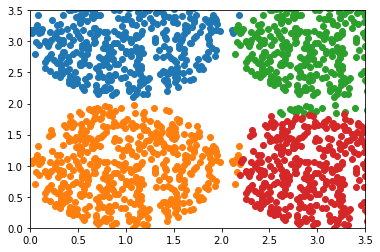

In [4]:
# Print final grouping
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)

for i in list(range(0, k)):
    print("Group {}".format(i))
    print(train_data[train_data['cluster_group'] == i])
    plt.scatter(train_data[train_data['cluster_group'] == i]["x"], train_data[train_data['cluster_group'] == i]["y"])

plt.show()